In [70]:
import pandas as pd
import geopandas as gpd
import matplotlib as plt

In [4]:
df = pd.read_csv("Medicare_Inpatient_Hospital_by_Provider_and_Service_2020.csv", encoding="latin")

In [11]:
df.head()

,Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_St,Rndrng_Prvdr_City,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,DRG_Cd,DRG_Desc,Tot_Dschrgs,Avg_Submtd_Cvrd_Chrg,Avg_Tot_Pymt_Amt,Avg_Mdcr_Pymt_Amt,MCR_ratio
0,10001,Southeast Health Medical Center,1108 Ross Clark Circle,Dothan,AL,1,36301,1.0,Metropolitan area core: primary flow within an...,23,CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACUTE COM...,51,166625.86275,37033.313725,33908.450980,4.499351
1,10001,Southeast Health Medical Center,1108 Ross Clark Circle,Dothan,AL,1,36301,1.0,Metropolitan area core: primary flow within an...,24,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,16,105888.12500,26208.687500,22531.250000,4.040192
2,10001,Southeast Health Medical Center,1108 Ross Clark Circle,Dothan,AL,1,36301,1.0,Metropolitan area core: primary flow within an...,25,CRANIOTOMY & ENDOVASCULAR INTRACRANIAL PROCEDU...,30,182686.36667,29491.533333,27775.500000,6.194536
3,10001,Southeast Health Medical Center,1108 Ross Clark Circle,Dothan,AL,1,36301,1.0,Metropolitan area core: primary flow within an...,27,CRANIOTOMY & ENDOVASCULAR INTRACRANIAL PROCEDU...,11,117292.90909,15641.000000,14357.181818,7.499067
4,10001,Southeast Health Medical Center,1108 Ross Clark Circle,Dothan,AL,1,36301,1.0,Metropolitan area core: primary flow within an...,38,EXTRACRANIAL PROCEDURES WITH CC,25,112528.68000,11398.560000,9559.280000,9.872184


In [10]:
#get MCR payment ratio
df["MCR_ratio"] = df["Avg_Submtd_Cvrd_Chrg"]/df["Avg_Tot_Pymt_Amt"]

In [29]:
df_grouped = df.groupby(["Rndrng_Prvdr_State_Abrvtn"]).agg({"MCR_ratio":"mean"})
df_grouped = df_grouped.reset_index()

In [30]:
df_grouped = df_grouped.rename(columns={"Rndrng_Prvdr_State_Abrvtn":"STUSPS"})

In [31]:
df_grouped.head()

,STUSPS,MCR_ratio
0,AK,4.811317
1,AL,5.126836
2,AR,3.988106
3,AZ,5.814651
4,CA,6.322872


In [112]:
df_grouped = df_grouped.sort_values(by="MCR_ratio", ascending=False)

In [115]:
df_grouped.head(10).to_csv("top10.csv")

In [24]:
us_map = gpd.read_file("cb_2018_us_state_500k.shp")

In [35]:
us_map.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [61]:
states = ['MS',
 'NC',
 'OK',
 'VA',
 'WV',
 'LA',
 'MI',
 'MA',
 'ID',
 'FL',
 'NE',
 'WA',
 'NM',
 'PR',
 'SD',
 'TX',
 'CA',
 'AL',
 'GA',
 'PA',
 'MO',
 'CO',
 'UT',
 'TN',
 'WY',
 'NY',
 'KS',
 'NV',
 'IL',
 'VT',
 'MT',
 'IA',
 'SC',
 'NH',
 'AZ',
 'DC',
 'AS',
 'VI',
 'NJ',
 'MD',
 'ME',
 'DE',
 'GU',
 'MP',
 'RI',
 'KY',
 'OH',
 'WI',
 'OR',
 'ND',
 'AR',
 'IN',
 'MN',
 'CT']

In [64]:
us_map_f = us_map[["STUSPS","geometry"]]
us_map_f = us_map_f[us_map_f["STUSPS"].isin(states)]

In [67]:
merge = us_map_f.merge(df_grouped, on="STUSPS", how="left")

(-127.65372665000001, -64.05923634999999, 23.2800329, 50.6274211)

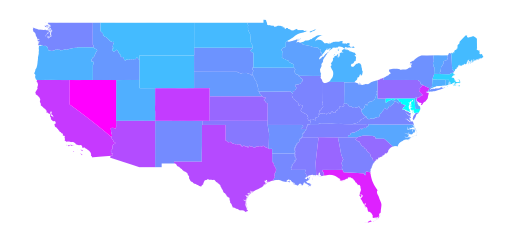

In [77]:
merge.plot(column="MCR_ratio", cmap="cool").axis("off")

In [ ]:
merge.plot(column="MCR_ratio", cmap="cool", figsize=(15,25), legend=True,  legend_kwds={'label': "Average Inpatient Billed Amounts (as a multiple of Medicare Payment)", 'orientation': "horizontal"}).axis("off")